# Homework 9

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Original image

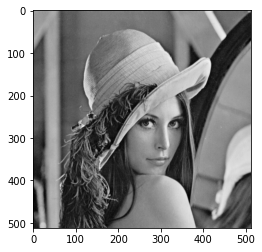

In [2]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

## Edge detection

In [3]:
class EdgeDetection:
    def conv2d(self, img, kernel, padding=None):
        if padding is None:
            padding = kernel.shape[0] // 2
            
        expanded_img = self._add_padding(img, padding)
        result_img = np.zeros(img.shape, dtype='int32')
        
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                result_img[i, j] = self._convolve2d(
                        expanded_img[i: i+2*padding+1, 
                                     j: j+2*padding+1], 
                        kernel)
        
        return result_img

    
    def _add_padding(self, img, padding):
        expanded_img = np.zeros((img.shape[0] + 2*padding, 
                                 img.shape[1] + 2*padding), 
                                dtype='uint8')
        expanded_img[padding:-padding, padding:-padding] = img

        for i in range(padding):
            expanded_img[padding-i-1] = expanded_img[padding-i]
            expanded_img[-padding+i] = expanded_img[-padding+i-1]
            expanded_img[:, padding-i-1] = expanded_img[:, padding-i]
            expanded_img[:, -padding+i] = expanded_img[:, -padding+i-1]
            
        return expanded_img
    
    
    def _convolve2d(self, subimg, kernel):
        kernel = np.flipud(np.fliplr(kernel))
        return (subimg * kernel).sum()
    
    
    def process(self, img, threshold):
        pass

In [4]:
class GradientEdgeDetection(EdgeDetection):
    def process(self, img, threshold=None):
        if threshold is not None:
            self.threshold = threshold
            
        gx = self.conv2d(img, self.k1)
        gy = self.conv2d(img, self.k2)
        
        return np.invert(np.sqrt(gx ** 2 + gy ** 2) > self.threshold) * 255

In [5]:
class CompassEdgeDetection(EdgeDetection):
    def process(self, img, threshold=None):
        if threshold is not None:
            self.threshold = threshold
        
        results = []
        for kernel in self.kernels:
            results.append(self.conv2d(img, kernel))
            
        return np.invert(np.max(results, axis=0) > self.threshold) * 255

### Roberts

In [6]:
class Roberts(GradientEdgeDetection):
    k1 = np.array([[0, 0,  0],
                   [0, 1,  0],
                   [0, 0, -1]])
    k2 = np.array([[0,  0, 0],
                   [0,  0, 1],
                   [0, -1, 0]])
    threshold = 12

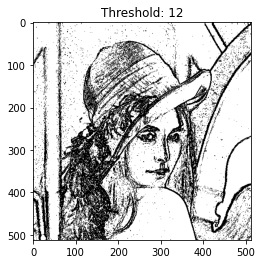

In [7]:
roberts = Roberts()
result_img = roberts.process(img)
plt.title(f'Threshold: {roberts.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Prewitt

In [8]:
class Prewitt(GradientEdgeDetection):
    k1 = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]])
    k2 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    threshold = 24

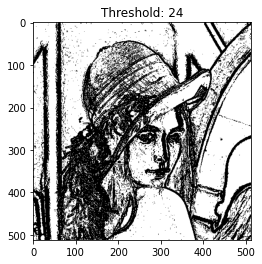

In [9]:
prewitt = Prewitt()
result_img = prewitt.process(img)
plt.title(f'Threshold: {prewitt.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Sobel

In [10]:
class Sobel(GradientEdgeDetection):
    k1 = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
    k2 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    threshold = 38

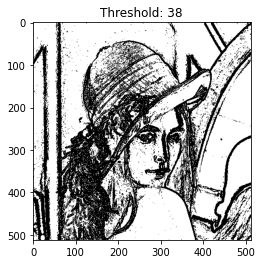

In [11]:
sobel = Sobel()
result_img = sobel.process(img)
plt.title(f'Threshold: {sobel.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Frei and Chen

In [12]:
class FreiChen(GradientEdgeDetection):
    k1 = np.array([[-1, -np.sqrt(2), -1],
                   [ 0,           0,  0],
                   [ 1,  np.sqrt(2),  1]])
    k2 = np.array([[         -1, 0,          1],
                   [-np.sqrt(2), 0, np.sqrt(2)],
                   [         -1, 0,          1]])
    threshold = 30

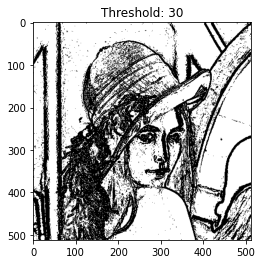

In [13]:
freichen = FreiChen()
result_img = freichen.process(img)
plt.title(f'Threshold: {freichen.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Kirsch

In [14]:
class Kirsch(CompassEdgeDetection):
    kernels = np.array([
        [[-3, -3,  5],
         [-3,  0,  5],
         [-3, -3,  5]],
        
        [[-3,  5,  5],
         [-3,  0,  5],
         [-3, -3, -3]],
        
        [[ 5,  5,  5],
         [-3,  0, -3],
         [-3, -3, -3]],
        
        [[ 5,  5, -3],
         [ 5,  0, -3],
         [-3, -3, -3]],
        
        [[ 5, -3, -3],
         [ 5,  0, -3],
         [ 5, -3, -3]],
        
        [[-3, -3, -3],
         [ 5,  0, -3],
         [ 5,  5, -3]],
        
        [[-3, -3, -3],
         [-3,  0, -3],
         [ 5,  5,  5]],
        
        [[-3, -3, -3],
         [-3,  0,  5],
         [-3,  5,  5]]
    ])
    threshold = 135

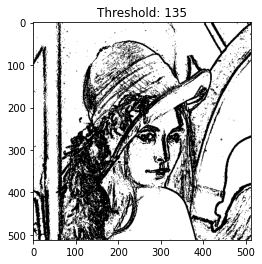

In [15]:
kirsch = Kirsch()
result_img = kirsch.process(img)
plt.title(f'Threshold: {kirsch.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Robinson

In [16]:
class Robinson(CompassEdgeDetection):
    kernels = np.array([
        [[-1,  0,  1],
         [-2,  0,  2],
         [-1,  0,  1]],

        [[ 0,  1,  2],
         [-1,  0,  1],
         [-2, -1,  0]],
        
        [[ 1,  2,  1],
         [ 0,  0,  0],
         [-1, -2, -1]],

        [[ 2,  1,  0],
         [ 1,  0, -1],
         [ 0, -1, -2]],

        [[ 1,  0, -1],
         [ 2,  0, -2],
         [ 1,  0, -1]],

        [[ 0, -1, -2],
         [ 1,  0, -1],
         [ 2,  1,  0]],

        [[-1, -2, -1],
         [ 0,  0,  0],
         [ 1,  2,  1]],

        [[-2, -1,  0],
         [-1,  0,  1],
         [ 0,  1,  2]]
    ])
    threshold = 43

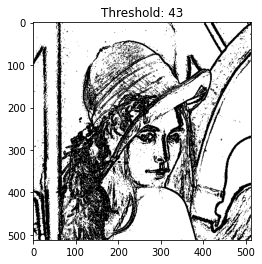

In [17]:
robinson = Robinson()
result_img = robinson.process(img)
plt.title(f'Threshold: {robinson.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()

### Nevatia-Babu

In [18]:
class NevatiaBabu(CompassEdgeDetection):
    kernels = np.array([
        [[ 100,  100,  100,  100,  100],
         [ 100,  100,  100,  100,  100],
         [   0,    0,    0,    0,    0],
         [-100, -100, -100, -100, -100],
         [-100, -100, -100, -100, -100]],
        
        [[ 100,  100,  100,  100,  100],
         [ 100,  100,  100,   78,  -32],
         [ 100,   92,    0,  -92, -100],
         [  32,  -78, -100, -100, -100],
         [-100, -100, -100, -100, -100]],

        [[100, 100,  100,   32, -100],
         [100, 100,   92,  -78, -100],
         [100, 100,    0, -100, -100],
         [100,  78,  -92, -100, -100],
         [100, -32, -100, -100, -100]],

        [[-100, -100, 0, 100, 100],
         [-100, -100, 0, 100, 100],
         [-100, -100, 0, 100, 100],
         [-100, -100, 0, 100, 100],
         [-100, -100, 0, 100, 100]],

        [[-100,   32,  100, 100, 100],
         [-100,  -78,   92, 100, 100],
         [-100, -100,    0, 100, 100],
         [-100, -100,  -92,  78, 100],
         [-100, -100, -100, -32, 100]],

        [[ 100,  100,  100,  100,  100],
         [ -32,   78,  100,  100,  100],
         [-100,  -92,    0,   92,  100],
         [-100, -100, -100,  -78,   32],
         [-100, -100, -100, -100, -100]]
    ])
    threshold = 12500

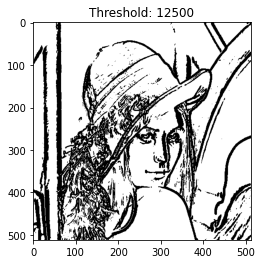

In [19]:
nevitababu = NevatiaBabu()
result_img = nevitababu.process(img)
plt.title(f'Threshold: {nevitababu.threshold}')
plt.imshow(result_img, cmap='gray')
plt.show()